In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# データの読み込み
df_H = pd.read_csv('H_PTCDI.csv')
df_I = pd.read_csv('I_PTCDI.csv')
df_N = pd.read_csv('N_PTCDI.csv')
del df_H['Unnamed: 0']
del df_I['Unnamed: 0']
del df_N['Unnamed: 0']
H = df_H
I = df_I
N = df_N
df_H['Mean Angle of Wings ($^\circ$)'] = (df_H['Angle of Wing1'] + df_H['Angle of Wing2'])/2
df_I['Mean Angle of Wings ($^\circ$)'] = (df_I['Angle of Wing1'] + df_I['Angle of Wing2'])/2
df_N['Mean Angle of Wings ($^\circ$)'] = (df_N['Angle of Wing1'] + df_N['Angle of Wing2'])/2

df_All = pd.concat([df_H,df_I,df_N], ignore_index=True)

H_xyz = pd.read_csv('H_xyz.csv')
I_xyz = pd.read_csv('I_xyz.csv')
N_xyz = pd.read_csv('N_xyz.csv')
del H_xyz['Unnamed: 0']
del I_xyz['Unnamed: 0']
del N_xyz['Unnamed: 0']

In [4]:
def Rename(df):
    df = df.rename(columns={'Mean Distance': 'Mean Distance (\N{ANGSTROM SIGN})',
                            'Centroid Distance': 'Centroid Distance (\N{ANGSTROM SIGN})',
                            'Distance of Wing Roots': 'Distance of Wing Roots (\N{ANGSTROM SIGN})',
                            'Angle of Wing1': 'Angle of Wing1 ($^\circ$)',
                            'Angle of Wing2': 'Angle of Wing2 ($^\circ$)',
                            'Theta_n': 'Dihedral angle ($^\circ$)',
                            'Theta_w': 'Heading angle ($^\circ$)'})
    return df

def fit_and_fig2(x,name):
    fig = sns.jointplot(x.columns[0], x.columns[1], data=x, kind="kde")
#     バックグラウンドを白に変更
#     fig.ax_joint.collections[0].set_alpha(0)
    fig.savefig(name+".png",format = 'png',dpi=300)

    
def fit_and_fig3(x,name):
    plt.hist(x[0], range=(50, 100))
    fig = sns.jointplot(x.columns[0], x.columns[1], data=x,)
#     バックグラウンドを白に変更
#     fig.ax_joint.collections[0].set_alpha(0)
    
def minimum(df, name, val):
    x = df[df[name] < min(df[name])+val]
    return x

def maximum(df, name, val):
    x = df[df[name] > max(df[name])+val]
    return x

def middle(df, name, val1, val2):
    x = df[df[name] > val1]
    x = x[x[name] < val2]
    return x

def match_by_time(df, df2):
    for num,i in enumerate(df2['Time (ps)'].values):
        x = df[df['Time (ps)'] == i]
        if num >0:
            new = pd.concat([old,x], ignore_index=True)
            old = new
        else:
            old = x
            new = x
    return new.iloc[:,:4]

In [5]:
# データ名の変更
df_H=Rename(df_H)
df_I=Rename(df_I)
df_N=Rename(df_N)
df_All=Rename(df_All)
df_All.head()

,Dimer ID,Time (ps),Mean Distance (Å),Centroid Distance (Å),Distance of Wing Roots (Å),Angle of Wing1 ($^\circ$),Angle of Wing2 ($^\circ$),Dihedral angle ($^\circ$),Heading angle ($^\circ$),Mean Angle of Wings ($^\circ$)
0,H,0.0,14.04,5.25,10.01,94.75,92.46,12.91,166.86,93.605
1,H,0.1,14.09,5.36,10.18,93.60,91.77,12.34,168.06,92.685
2,H,0.2,14.14,5.45,10.31,93.18,91.75,11.81,168.40,92.465
3,H,0.3,14.18,5.51,10.33,93.03,91.97,12.86,167.23,92.500
4,H,0.4,14.21,5.55,10.39,92.84,91.49,12.88,167.18,92.165


In [6]:
# データの分割、抽出
H2 = df_H[['Dihedral angle ($^\circ$)', 'Heading angle ($^\circ$)']]
I2 = df_I[['Dihedral angle ($^\circ$)', 'Heading angle ($^\circ$)']]
N2 = df_N[['Dihedral angle ($^\circ$)', 'Heading angle ($^\circ$)']]
HI2 = pd.concat([H2,I2], ignore_index=True)
All2 = pd.concat([H2,I2,N2], ignore_index=True)
H3 = df_H[['Distance of Wing Roots (\N{ANGSTROM SIGN})', 'Mean Angle of Wings ($^\circ$)']]
I3 = df_I[['Distance of Wing Roots (\N{ANGSTROM SIGN})', 'Mean Angle of Wings ($^\circ$)']]
N3 = df_N[['Distance of Wing Roots (\N{ANGSTROM SIGN})', 'Mean Angle of Wings ($^\circ$)']]
HI3 = pd.concat([H3,I3], ignore_index=True)
All3 = pd.concat([H3,I3,N3], ignore_index=True)

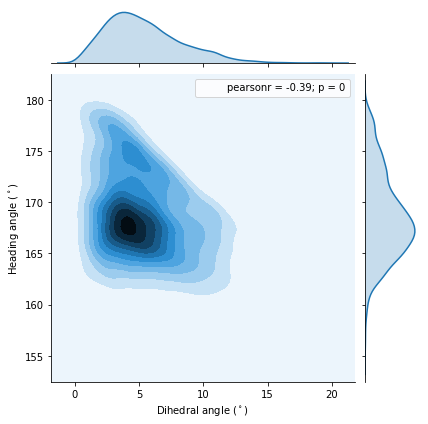

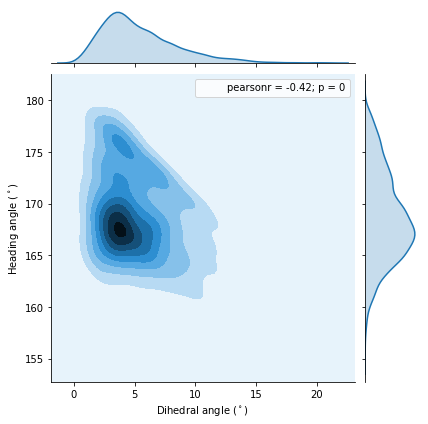

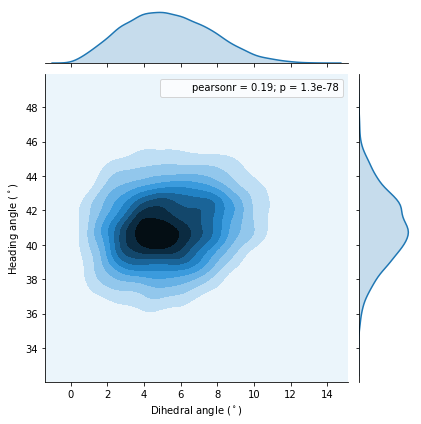

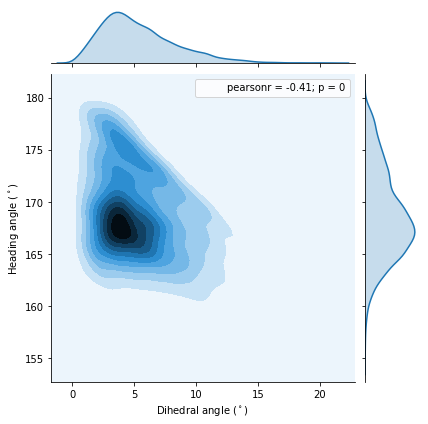

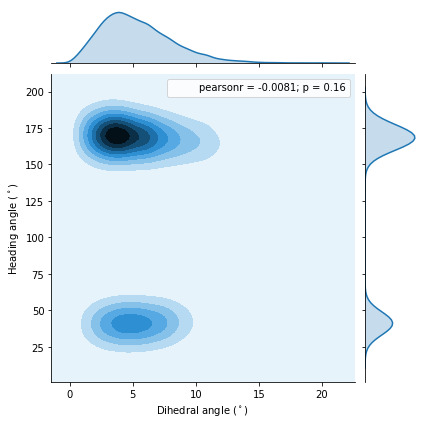

In [95]:
fit_and_fig2(H2,'H2')
fit_and_fig2(I2,'I2')
fit_and_fig2(N2,'N2')
fit_and_fig2(HI2,'HI2')
fit_and_fig2(All2,'all2')

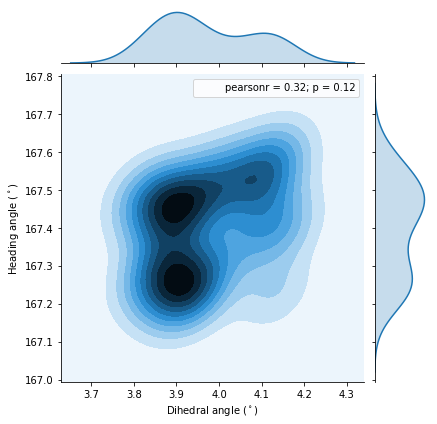

In [7]:
h2_st = H2[H2.iloc[:,1]>167.2]
h2_st = h2_st[h2_st.iloc[:,1]<167.6]
h2_st = h2_st[h2_st.iloc[:,0]<4.2]
h2_st = h2_st[h2_st.iloc[:,0]>3.8]
fig = sns.jointplot(h2_st.columns[0],h2_st.columns[1],h2_st,kind='kde')
name = "h2_st"
fig.savefig(name+".png",format = 'png',dpi=300)

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
711,3.92,167.45
4629,3.91,167.46
8824,3.88,167.42
9687,3.87,167.49


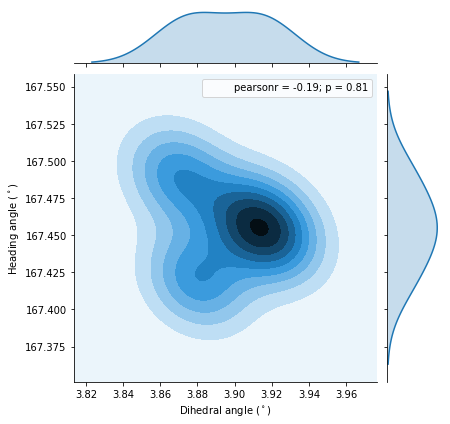

In [8]:
h2_ans = h2_st[h2_st.iloc[:,1]>167.4]
h2_ans = h2_ans[h2_ans.iloc[:,1]<167.5]
h2_ans = h2_ans[h2_ans.iloc[:,0]<3.95]
h2_ans = h2_ans[h2_ans.iloc[:,0]>3.85]
h2_ans
fig = sns.jointplot(h2_ans.columns[0],h2_ans.columns[1],h2_ans,kind='kde')
name = "h2_ans"
fig.savefig(name+".png",format = 'png',dpi=300)
h2_ans

In [9]:
h = h2_ans[h2_ans.iloc[:,1]==167.46]
h = h[h.iloc[:,0]==3.91]
h

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
4629,3.91,167.46


In [10]:
H[H['Theta_n']==3.91][H['Theta_w']==167.46]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Dimer ID,Time (ps),Mean Distance,Centroid Distance,Distance of Wing Roots,Angle of Wing1,Angle of Wing2,Theta_n,Theta_w,Mean Angle of Wings ($^\circ$)
4629,H,462.9,14.23,5.64,10.13,103.1,94.99,3.91,167.46,99.045


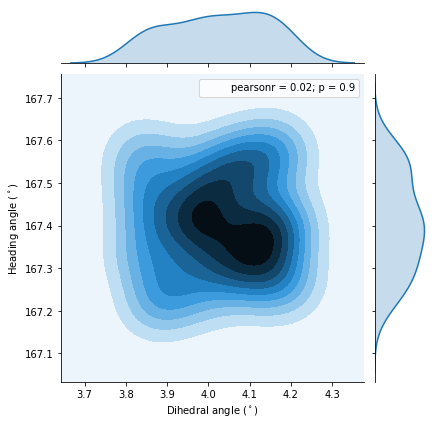

In [11]:
i2_st = I2[I2.iloc[:,1]>167.2]
i2_st = i2_st[i2_st.iloc[:,1]<167.6]
i2_st = i2_st[i2_st.iloc[:,0]<4.2]
i2_st = i2_st[i2_st.iloc[:,0]>3.8]
fig = sns.jointplot(i2_st.columns[0],i2_st.columns[1],i2_st,kind='kde')
name = "i2_st"
fig.savefig(name+".png",format = 'png',dpi=300)

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
425,4.12,167.32
1067,4.18,167.37
1527,4.18,167.38
3763,4.13,167.39
3928,4.10,167.31
4371,4.19,167.42
7200,4.15,167.31
9120,4.12,167.43
9469,4.12,167.40
9858,4.07,167.37


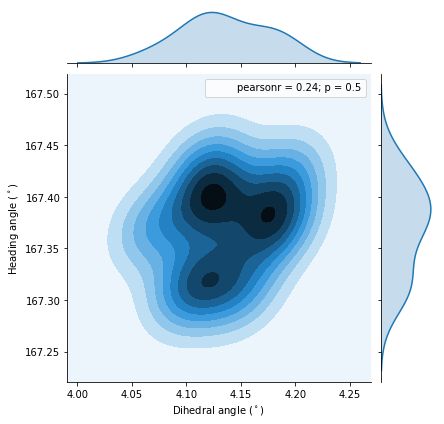

In [12]:
i2_ans = i2_st[i2_st.iloc[:,1]>167.3]
i2_ans = i2_ans[i2_ans.iloc[:,1]<167.45]
i2_ans = i2_ans[i2_ans.iloc[:,0]<4.2]
i2_ans = i2_ans[i2_ans.iloc[:,0]>4.05]
i2_ans
fig = sns.jointplot(i2_ans.columns[0],i2_ans.columns[1],i2_ans,kind='kde')
name = "i2_ans"
fig.savefig(name+".png",format = 'png',dpi=300)
i2_ans

In [13]:
i = i2_ans[i2_ans.iloc[:,1]==167.40]
i = i[i.iloc[:,0]==4.12]
i

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
9469,4.12,167.4


In [14]:
I[I['Theta_n']==4.12][I['Theta_w']==167.40]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Dimer ID,Time (ps),Mean Distance,Centroid Distance,Distance of Wing Roots,Angle of Wing1,Angle of Wing2,Theta_n,Theta_w,Mean Angle of Wings ($^\circ$)
9469,I,946.9,14.22,5.32,9.9,98.52,96.57,4.12,167.4,97.545


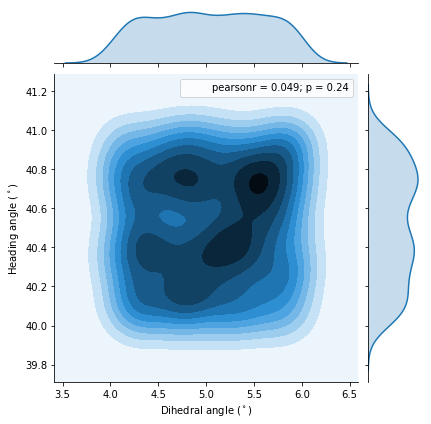

In [15]:
n2_st = N2[N2.iloc[:,1]>40]
n2_st = n2_st[n2_st.iloc[:,1]<41]
n2_st = n2_st[n2_st.iloc[:,0]<6]
n2_st = n2_st[n2_st.iloc[:,0]>4]
fig = sns.jointplot(n2_st.columns[0],n2_st.columns[1],n2_st,kind='kde')
name = "n2_st"
fig.savefig(name+".png",format = 'png',dpi=300)

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
164,5.64,40.72
914,5.46,40.77
1866,5.50,40.74
1879,5.64,40.70
2015,5.58,40.70
2016,5.59,40.69
2125,5.48,40.67
4176,5.58,40.69
5489,5.61,40.76
6087,5.69,40.77


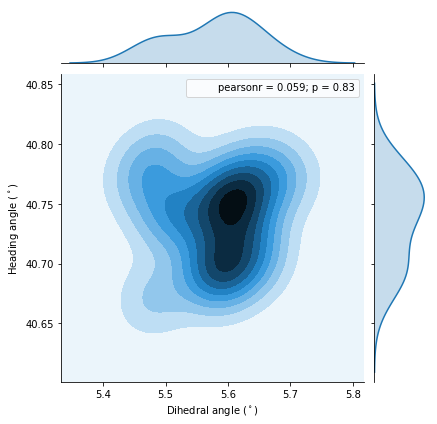

In [16]:
n2_ans = n2_st[n2_st.iloc[:,1]>40.65]
n2_ans = n2_ans[n2_ans.iloc[:,1]<40.8]
n2_ans = n2_ans[n2_ans.iloc[:,0]<5.7]
n2_ans = n2_ans[n2_ans.iloc[:,0]>5.45]
n2_ans
fig = sns.jointplot(n2_ans.columns[0],n2_ans.columns[1],n2_ans,kind='kde')
name = "n2_ans"
fig.savefig(name+".png",format = 'png',dpi=300)
n2_ans

In [17]:
n = n2_ans[n2_ans.iloc[:,1]==40.76]
n = n[n.iloc[:,0]==5.60]
n

,Dihedral angle ($^\circ$),Heading angle ($^\circ$)
6292,5.6,40.76


In [18]:
N[N['Theta_n']==5.6][N['Theta_w']==40.76]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Dimer ID,Time (ps),Mean Distance,Centroid Distance,Distance of Wing Roots,Angle of Wing1,Angle of Wing2,Theta_n,Theta_w,Mean Angle of Wings ($^\circ$)
6292,N,629.2,7.03,5.63,7.23,73.28,82.87,5.6,40.76,78.075


In [24]:
OutliersH = H[H['Theta_n']==3.91][H['Theta_w']==167.46]
H_out = match_by_time(H_xyz,OutliersH)
H_out.to_csv('H_out', sep = ' ', index=False, float_format='%.4f')
OutliersI = I[I['Theta_n']==4.12][I['Theta_w']==167.40]
I_out = match_by_time(I_xyz,OutliersI)
I_out.to_csv('I_out', sep = ' ', index=False, float_format='%.4f')
OutliersN = N[N['Theta_n']==5.6][N['Theta_w']==40.76]
N_out = match_by_time(N_xyz,OutliersN)
N_out.to_csv('N_out', sep = ' ', index=False, float_format='%.4f')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [322]:
# # ヒストグラムとkde
# plt.figure(figsize=(14,7))
# H3['Mean Angle of Wings ($^\circ$)'].plot(kind="hist", bins=30, alpha=0.5)
# out = H3['Mean Angle of Wings ($^\circ$)'].plot(kind="kde", secondary_y=True)
# plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


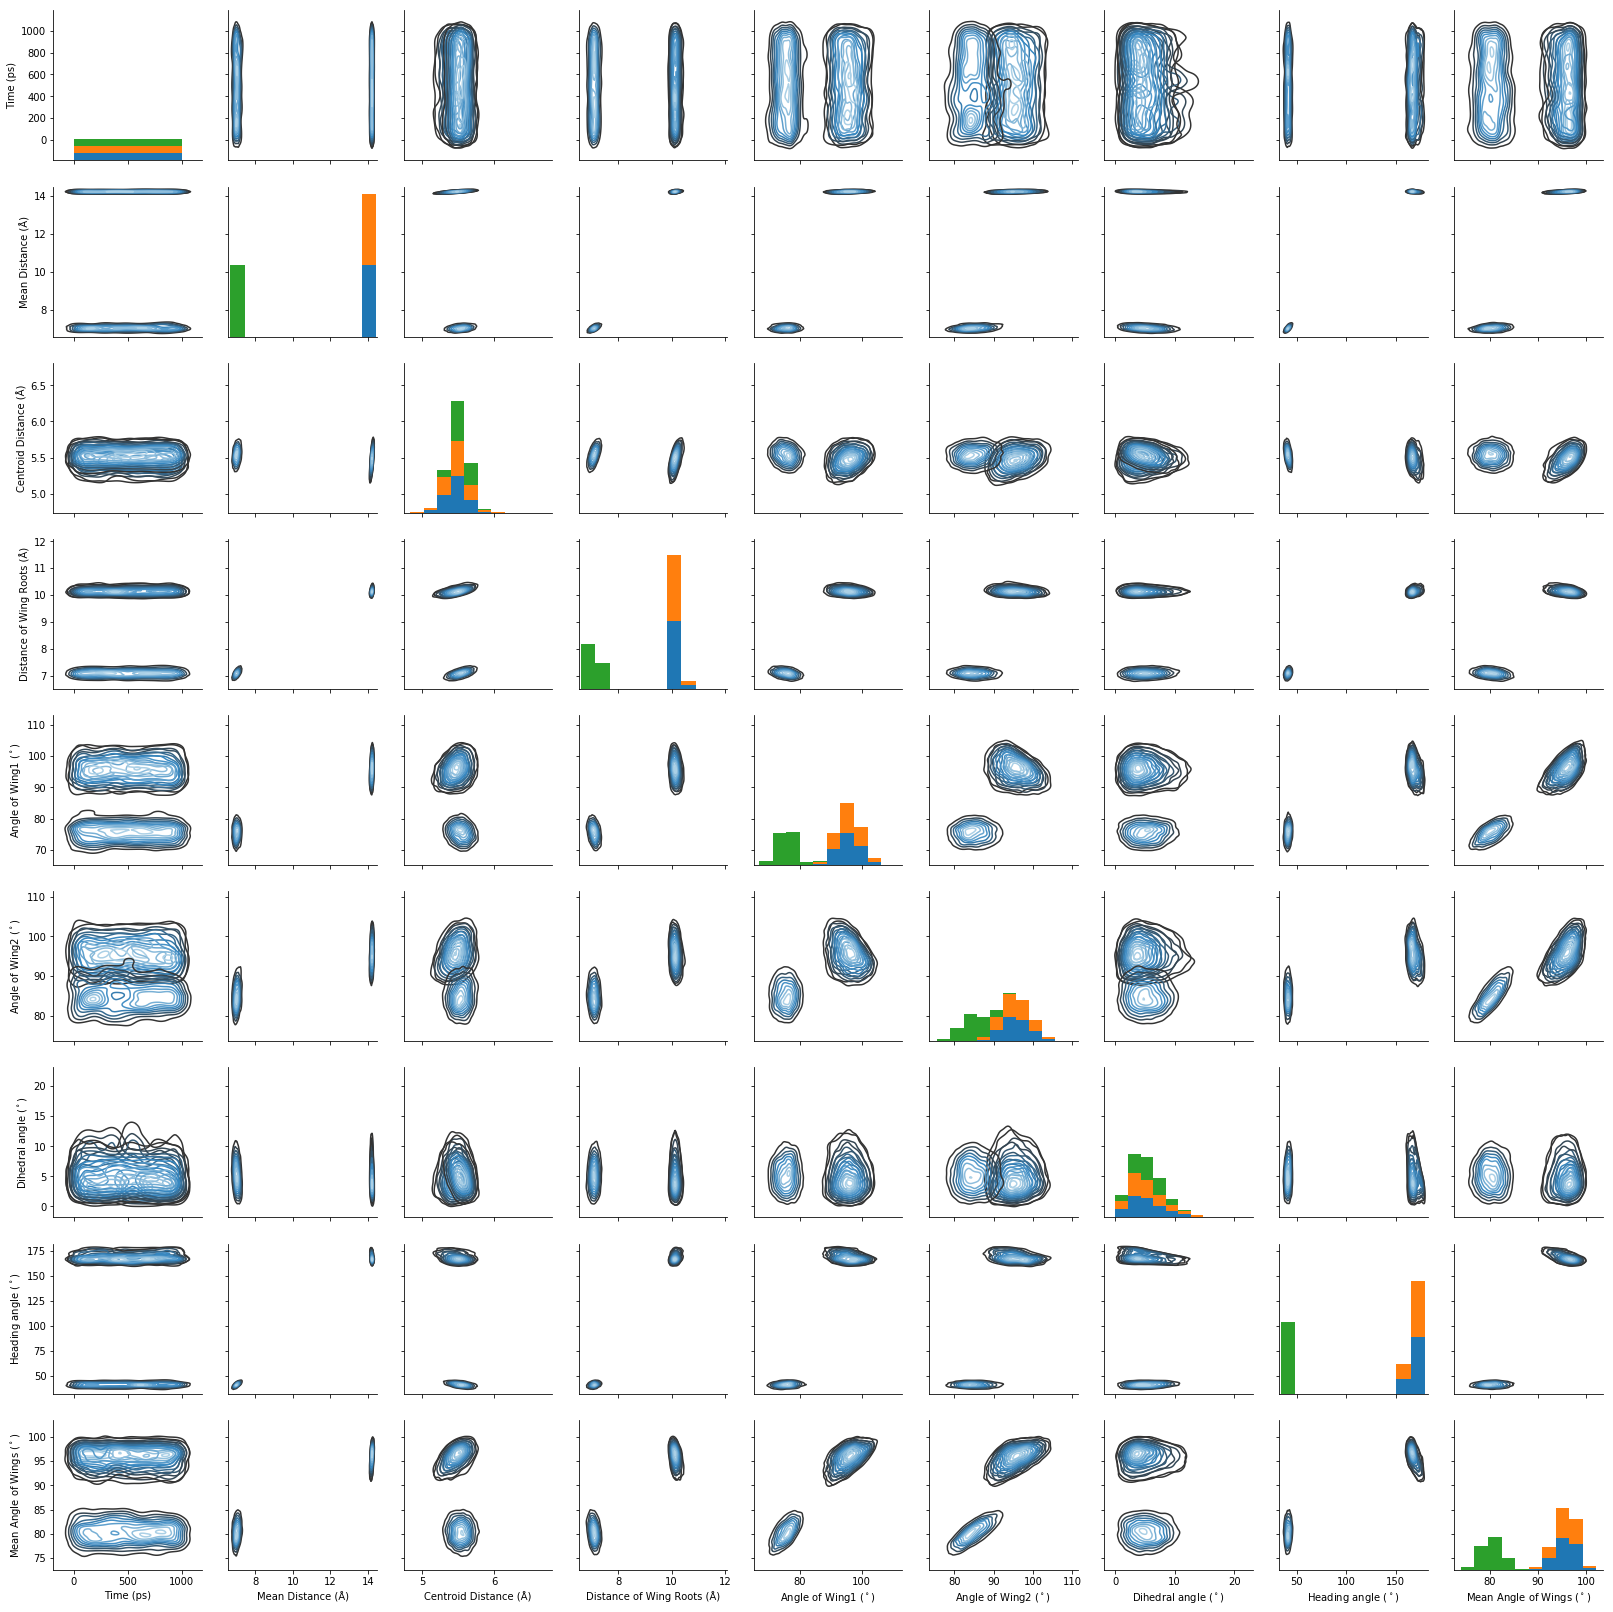

In [99]:
g = sns.PairGrid(df_All, hue="Dimer ID") #palette='Blues'
g.map_diag(plt.hist)
# g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(sns.kdeplot,cmap="Blues_d")
# g.add_legend()
g.savefig("all.png")

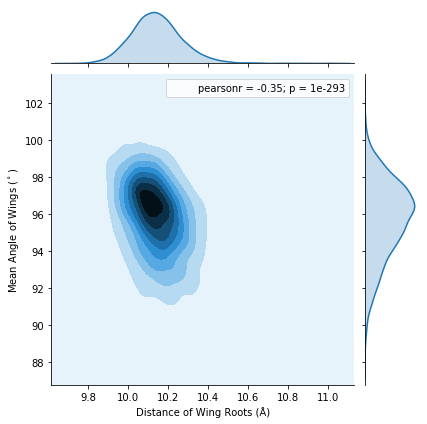

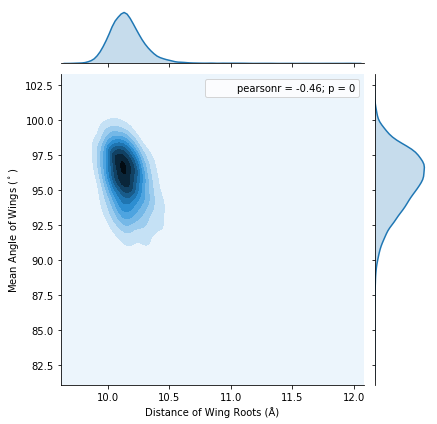

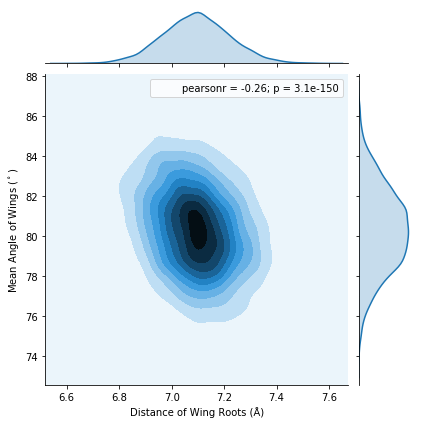

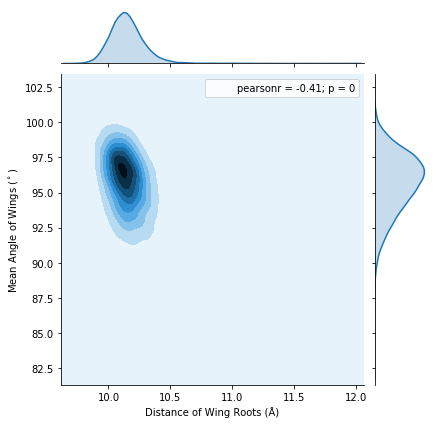

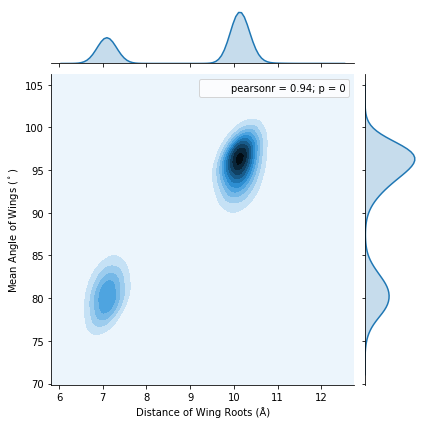

In [9]:
fit_and_fig2(H3,'H3')
fit_and_fig2(I3,'I3')
fit_and_fig2(N3,'N3')
fit_and_fig2(HI3,'HI3')
fit_and_fig2(All3,'all3')

In [432]:
# df_H.describe()

In [490]:
OutliersH = middle(df_H,'Mean Angle of Wings ($^\circ$)',83,86)
H_out = match_by_time(H_xyz,OutliersH)
H_out.to_csv('H_out', sep = ' ', index=False, float_format='%.4f')

In [11]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x1130d7f28>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        Function used to calculate a statist